C:\Users\lukew\AppData\Local\Temp\ipykernel_7620\897704779.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dat_mcar['y_imputed_mean'].fillna(dat_mcar['y_missing'].mean(), inplace=True)


              Model  x1_Coeff  x2_Coeff
0              Full  0.226814  0.225022
1      MCAR_Missing  0.236689  0.245410
2  MCAR_MeanImputed  0.179993  0.196507
3       MAR_Missing  0.230363  0.241123
4    MAR_RegImputed  0.230363  0.241123


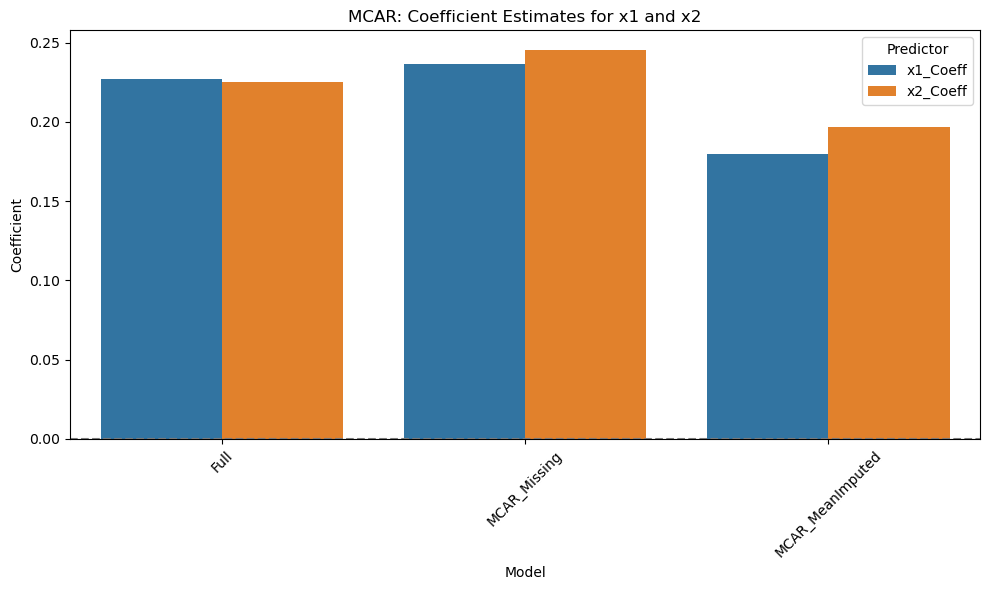

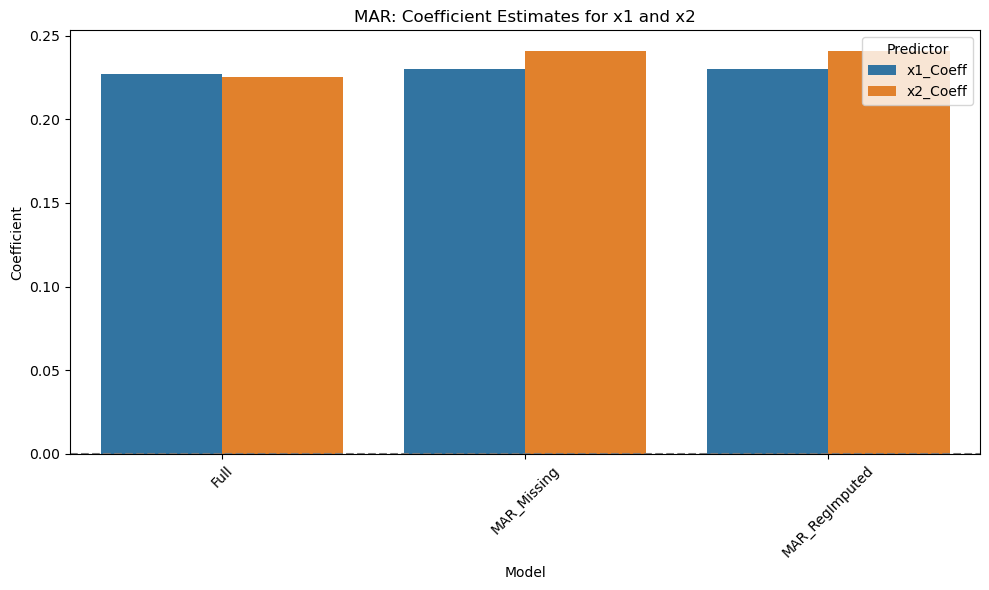

In [10]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Simulate complete data
def sim_dat(n=500, npred=2, seed=1):
    np.random.seed(seed)
    mu = [0] * (npred + 1)
    Sigma = np.ones((npred + 1, npred + 1)) * 0.5
    np.fill_diagonal(Sigma, 1.5)
    dat = np.random.multivariate_normal(mu, Sigma, n)
    colnames = ['y'] + [f'x{i}' for i in range(1, npred + 1)]
    return pd.DataFrame(dat, columns=colnames)

# MCAR Missingness
def sim_mcar(dat, p=0.2, seed=1):
    random.seed(seed)
    dat = dat.copy()
    dat['y_missing'] = dat['y']
    missing = random.sample(range(len(dat)), int(len(dat) * p))
    dat.loc[missing, 'y_missing'] = np.nan
    return dat

# MAR Missingness
def sim_mar(dat, p=0.2, seed=1):
    np.random.seed(seed)
    dat = dat.copy()
    dat['y_missing'] = dat['y']
    ordering = np.argsort(dat['x1'] + np.random.normal(size=len(dat)))
    selected = dat.iloc[ordering[:int(p * len(dat))]]
    dat.loc[selected.index, 'y_missing'] = np.nan
    return dat

# Full data
dat_full = sim_dat()

# MCAR + Mean imputation
dat_mcar = sim_mcar(dat_full, p=0.2, seed=1)
dat_mcar['y_imputed_mean'] = dat_mcar['y_missing'].copy()
dat_mcar['y_imputed_mean'].fillna(dat_mcar['y_missing'].mean(), inplace=True)

# MAR + Regression imputation
dat_mar = sim_mar(dat_full, p=0.2, seed=1)
model_reg = smf.ols('y_missing ~ x1 + x2', data=dat_mar).fit()
preds = model_reg.predict(dat_mar[['x1', 'x2']])
dat_mar['y_imputed_reg'] = dat_mar['y_missing'].copy()
missing = dat_mar['y_missing'].isna()
dat_mar.loc[missing, 'y_imputed_reg'] = preds[missing]

# Fit models and extract coefficients
models = {
    'Full': smf.ols('y ~ x1 + x2', data=dat_full).fit(),
    'MCAR_Missing': smf.ols('y_missing ~ x1 + x2', data=dat_mcar.dropna()).fit(),
    'MCAR_MeanImputed': smf.ols('y_imputed_mean ~ x1 + x2', data=dat_mcar).fit(),
    'MAR_Missing': smf.ols('y_missing ~ x1 + x2', data=dat_mar.dropna()).fit(),
    'MAR_RegImputed': smf.ols('y_imputed_reg ~ x1 + x2', data=dat_mar).fit()
}

# Build summary dataframe
summary_df = pd.DataFrame({
    'Model': [],
    'x1_Coeff': [],
    'x2_Coeff': []
})

for name, model in models.items():
    summary_df = pd.concat([summary_df, pd.DataFrame({
        'Model': [name],
        'x1_Coeff': [model.params.get('x1')],
        'x2_Coeff': [model.params.get('x2')]
    })], ignore_index=True)

print(summary_df)

# Plot MCAR Comparison
mcar_plot_data = summary_df[summary_df['Model'].str.contains('MCAR|Full')].melt(
    id_vars='Model', value_vars=['x1_Coeff', 'x2_Coeff'],
    var_name='Predictor', value_name='Coefficient'
)

plt.figure(figsize=(10, 6))
sns.barplot(data=mcar_plot_data, x='Model', y='Coefficient', hue='Predictor')
plt.title('MCAR: Coefficient Estimates for x1 and x2')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAR Comparison
mar_plot_data = summary_df[summary_df['Model'].str.contains('MAR|Full')].melt(
    id_vars='Model', value_vars=['x1_Coeff', 'x2_Coeff'],
    var_name='Predictor', value_name='Coefficient'
)

plt.figure(figsize=(10, 6))
sns.barplot(data=mar_plot_data, x='Model', y='Coefficient', hue='Predictor')
plt.title('MAR: Coefficient Estimates for x1 and x2')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\lukew\AppData\Local\Temp\ipykernel_7620\897704779.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dat_mcar['y_imputed_mean'].fillna(dat_mcar['y_missing'].mean(), inplace=True)


              Model  x1_Coeff  x2_Coeff
0              Full  0.226814  0.225022
1      MCAR_Missing  0.236689  0.245410
2  MCAR_MeanImputed  0.179993  0.196507
3       MAR_Missing  0.230363  0.241123
4    MAR_RegImputed  0.230363  0.241123


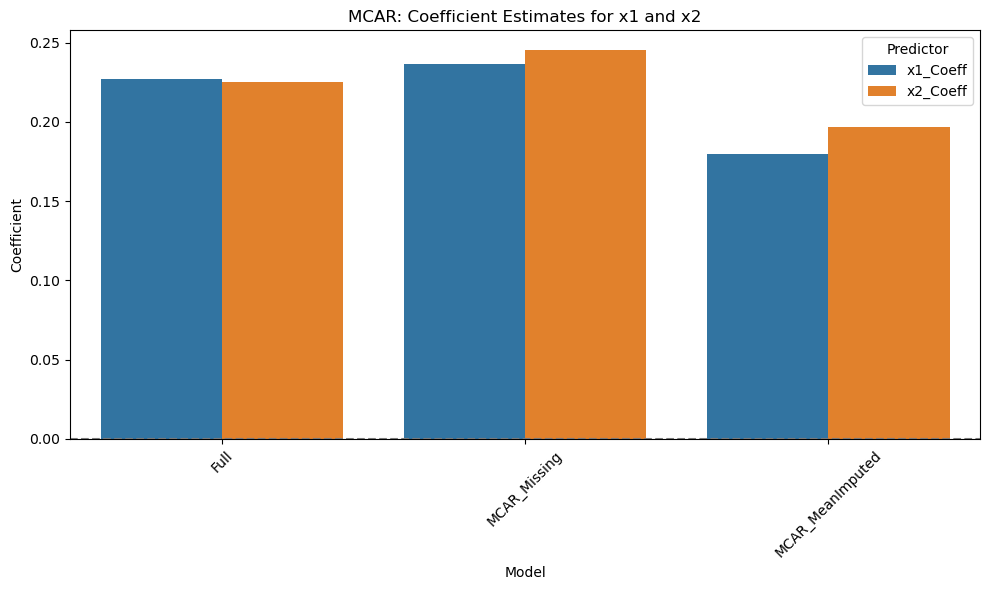

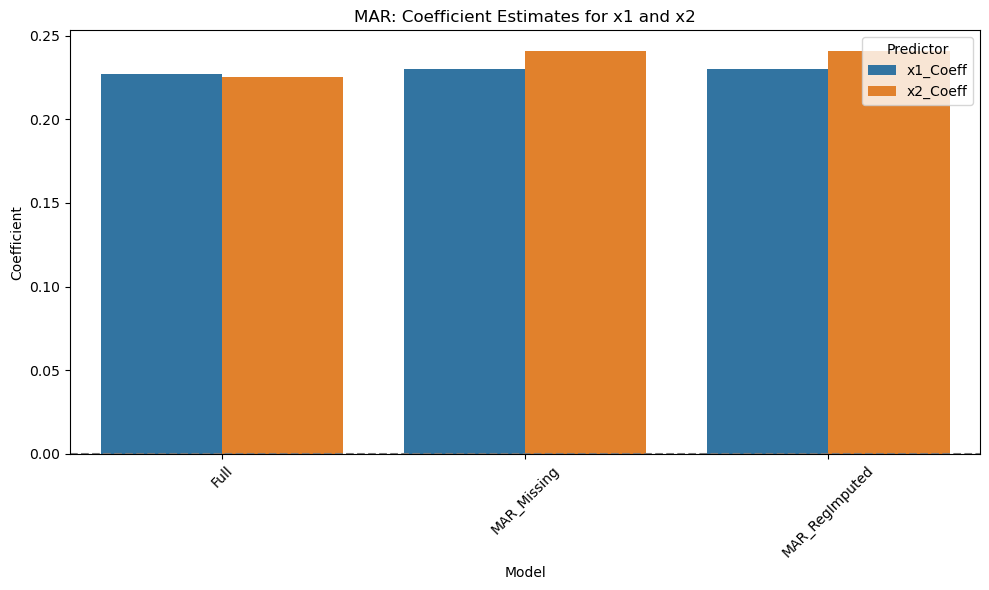

In [10]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Simulate complete data
def sim_dat(n=500, npred=2, seed=1):
    np.random.seed(seed)
    mu = [0] * (npred + 1)
    Sigma = np.ones((npred + 1, npred + 1)) * 0.5
    np.fill_diagonal(Sigma, 1.5)
    dat = np.random.multivariate_normal(mu, Sigma, n)
    colnames = ['y'] + [f'x{i}' for i in range(1, npred + 1)]
    return pd.DataFrame(dat, columns=colnames)

# MCAR Missingness
def sim_mcar(dat, p=0.2, seed=1):
    random.seed(seed)
    dat = dat.copy()
    dat['y_missing'] = dat['y']
    missing = random.sample(range(len(dat)), int(len(dat) * p))
    dat.loc[missing, 'y_missing'] = np.nan
    return dat

# MAR Missingness
def sim_mar(dat, p=0.2, seed=1):
    np.random.seed(seed)
    dat = dat.copy()
    dat['y_missing'] = dat['y']
    ordering = np.argsort(dat['x1'] + np.random.normal(size=len(dat)))
    selected = dat.iloc[ordering[:int(p * len(dat))]]
    dat.loc[selected.index, 'y_missing'] = np.nan
    return dat

# Full data
dat_full = sim_dat()

# MCAR + Mean imputation
dat_mcar = sim_mcar(dat_full, p=0.2, seed=1)
dat_mcar['y_imputed_mean'] = dat_mcar['y_missing'].copy()
dat_mcar['y_imputed_mean'].fillna(dat_mcar['y_missing'].mean(), inplace=True)

# MAR + Regression imputation
dat_mar = sim_mar(dat_full, p=0.2, seed=1)
model_reg = smf.ols('y_missing ~ x1 + x2', data=dat_mar).fit()
preds = model_reg.predict(dat_mar[['x1', 'x2']])
dat_mar['y_imputed_reg'] = dat_mar['y_missing'].copy()
missing = dat_mar['y_missing'].isna()
dat_mar.loc[missing, 'y_imputed_reg'] = preds[missing]

# Fit models and extract coefficients
models = {
    'Full': smf.ols('y ~ x1 + x2', data=dat_full).fit(),
    'MCAR_Missing': smf.ols('y_missing ~ x1 + x2', data=dat_mcar.dropna()).fit(),
    'MCAR_MeanImputed': smf.ols('y_imputed_mean ~ x1 + x2', data=dat_mcar).fit(),
    'MAR_Missing': smf.ols('y_missing ~ x1 + x2', data=dat_mar.dropna()).fit(),
    'MAR_RegImputed': smf.ols('y_imputed_reg ~ x1 + x2', data=dat_mar).fit()
}

# Build summary dataframe
summary_df = pd.DataFrame({
    'Model': [],
    'x1_Coeff': [],
    'x2_Coeff': []
})

for name, model in models.items():
    summary_df = pd.concat([summary_df, pd.DataFrame({
        'Model': [name],
        'x1_Coeff': [model.params.get('x1')],
        'x2_Coeff': [model.params.get('x2')]
    })], ignore_index=True)

print(summary_df)

# Plot MCAR Comparison
mcar_plot_data = summary_df[summary_df['Model'].str.contains('MCAR|Full')].melt(
    id_vars='Model', value_vars=['x1_Coeff', 'x2_Coeff'],
    var_name='Predictor', value_name='Coefficient'
)

plt.figure(figsize=(10, 6))
sns.barplot(data=mcar_plot_data, x='Model', y='Coefficient', hue='Predictor')
plt.title('MCAR: Coefficient Estimates for x1 and x2')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAR Comparison
mar_plot_data = summary_df[summary_df['Model'].str.contains('MAR|Full')].melt(
    id_vars='Model', value_vars=['x1_Coeff', 'x2_Coeff'],
    var_name='Predictor', value_name='Coefficient'
)

plt.figure(figsize=(10, 6))
sns.barplot(data=mar_plot_data, x='Model', y='Coefficient', hue='Predictor')
plt.title('MAR: Coefficient Estimates for x1 and x2')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
